In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [97]:
df = pd.read_csv('datasets/Ibovespa4anos.csv',parse_dates=['Data'])
display(df.head(20))

C:\Users\rpjun\AppData\Local\Temp\ipykernel_144\451688021.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('datasets/Ibovespa4anos.csv',parse_dates=['Data'])


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2024-05-24,124.306,124.731,125.257,124.259,"9,21M","-0,34%"
1,2024-05-23,124.729,125.650,125.665,124.431,"9,99M","-0,73%"
2,2024-05-22,125.650,127.412,127.412,125.524,"12,40M","-1,38%"
3,2024-05-21,127.412,127.754,128.272,127.205,"9,14M","-0,27%"
4,2024-05-20,127.751,128.151,128.730,127.488,"9,34M","-0,31%"
5,2024-05-17,128.151,128.280,128.464,127.696,"10,26M","-0,10%"
6,2024-05-16,128.284,128.029,128.965,127.922,"9,86M","0,20%"
7,2024-05-15,128.028,128.514,128.646,127.029,"10,86M","-0,38%"
8,2024-05-14,128.515,128.155,128.965,127.962,"11,89M","0,28%"
9,2024-05-13,128.155,127.600,128.669,127.599,"8,92M","0,44%"


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1094 non-null   datetime64[ns]
 1   Último    1094 non-null   float64       
 2   Abertura  1094 non-null   float64       
 3   Máxima    1094 non-null   float64       
 4   Mínima    1094 non-null   float64       
 5   Vol.      1094 non-null   object        
 6   Var%      1094 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 60.0+ KB


In [99]:
df_new = df.copy().drop(columns='Var%')

In [100]:
selecao = df_new['Vol.'].str.contains('K')
df_new[selecao]

,Data,Último,Abertura,Máxima,Mínima,Vol.


In [101]:
df_new.rename(columns={'Data':'ds','Último':'y','Abertura':'abertura','Máxima':'maxima','Mínima':'minima','Vol.':'volume'}, inplace=True)

In [102]:
df_new.head()

,ds,y,abertura,maxima,minima,volume
0,2024-05-24,124.306,124.731,125.257,124.259,"9,21M"
1,2024-05-23,124.729,125.650,125.665,124.431,"9,99M"
2,2024-05-22,125.650,127.412,127.412,125.524,"12,40M"
3,2024-05-21,127.412,127.754,128.272,127.205,"9,14M"
4,2024-05-20,127.751,128.151,128.730,127.488,"9,34M"


In [103]:
df_new['volume'].fillna('0', inplace=True)

C:\Users\rpjun\AppData\Local\Temp\ipykernel_144\2870134375.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['volume'].fillna('0', inplace=True)


In [104]:
df_new['volume'] = df_new['volume'].str.replace('M','',regex=False).str.replace(',','.',regex=False).astype(float)

In [105]:
df_new['volume'] = df_new['volume'] * 1_000_000

In [106]:
df_new.head()

,ds,y,abertura,maxima,minima,volume
0,2024-05-24,124.306,124.731,125.257,124.259,9210000.0
1,2024-05-23,124.729,125.650,125.665,124.431,9990000.0
2,2024-05-22,125.650,127.412,127.412,125.524,12400000.0
3,2024-05-21,127.412,127.754,128.272,127.205,9140000.0
4,2024-05-20,127.751,128.151,128.730,127.488,9340000.0


In [107]:
df_data = df_new.copy()

In [108]:
df_data.set_index('ds',inplace=True)

In [109]:
df_data['return'] = (df_data['y'].pct_change() * 100)

In [110]:
returns = df_data.replace(-np.inf, np.nan).dropna()
returns.tail()

,y,abertura,maxima,minima,volume,return
ds,,,,,,
2020-01-08,116.247,116.667,117.335,115.693,5910000.0,0.258739
2020-01-07,116.662,116.872,117.076,115.965,4850000.0,0.356998
2020-01-06,116.878,117.707,117.707,116.269,6570000.0,0.185150
2020-01-03,117.707,118.564,118.792,117.341,6830000.0,0.709287
2020-01-02,118.573,115.652,118.573,115.649,5160000.0,0.735725


In [111]:
df_data['lagged_return'] = df_data["return"].shift()
cad_jpy_df = df_data.dropna()
cad_jpy_df.tail()

,y,abertura,maxima,minima,volume,return,lagged_return
ds,,,,,,,
2020-01-08,116.247,116.667,117.335,115.693,5910000.0,0.258739,0.384406
2020-01-07,116.662,116.872,117.076,115.965,4850000.0,0.356998,0.258739
2020-01-06,116.878,117.707,117.707,116.269,6570000.0,0.185150,0.356998
2020-01-03,117.707,118.564,118.792,117.341,6830000.0,0.709287,0.185150
2020-01-02,118.573,115.652,118.573,115.649,5160000.0,0.735725,0.709287


In [112]:
df_data.head()

,y,abertura,maxima,minima,volume,return,lagged_return
ds,,,,,,,
2024-05-24,124.306,124.731,125.257,124.259,9210000.0,NaN,NaN
2024-05-23,124.729,125.650,125.665,124.431,9990000.0,0.340289,NaN
2024-05-22,125.650,127.412,127.412,125.524,12400000.0,0.738401,0.340289
2024-05-21,127.412,127.754,128.272,127.205,9140000.0,1.402308,0.738401
2024-05-20,127.751,128.151,128.730,127.488,9340000.0,0.266066,1.402308


In [113]:
df_data.sort_index(inplace=True)

In [114]:
train = df_data.loc[:'2023-01-01']
test = df_data.loc['2022-01-01':]

In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 598 entries, 2022-01-03 to 2024-05-24
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   y              598 non-null    float64
 1   abertura       598 non-null    float64
 2   maxima         598 non-null    float64
 3   minima         598 non-null    float64
 4   volume         598 non-null    float64
 5   return         597 non-null    float64
 6   lagged_return  596 non-null    float64
dtypes: float64(7)
memory usage: 37.4 KB


In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 746 entries, 2020-01-02 to 2022-12-29
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   y              746 non-null    float64
 1   abertura       746 non-null    float64
 2   maxima         746 non-null    float64
 3   minima         746 non-null    float64
 4   volume         746 non-null    float64
 5   return         746 non-null    float64
 6   lagged_return  746 non-null    float64
dtypes: float64(7)
memory usage: 46.6 KB


In [117]:
x_train = train["lagged_return"].to_frame()
y_train = train["return"]
x_test = test["lagged_return"].to_frame()
y_test = test["return"]

In [118]:
x_test.fillna(0, inplace=True)

In [119]:
x_train.head()

,lagged_return
ds,
2020-01-02,0.709287
2020-01-03,0.185150
2020-01-06,0.356998
2020-01-07,0.258739
2020-01-08,0.384406


In [120]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [121]:
predictions = model.predict(x_test)

In [122]:
results = y_test.to_frame()
results["predict"] = predictions
results.head(2)

,return,predict
ds,,
2022-01-03,0.394150,-0.438733
2022-01-04,2.483021,0.146779


In [123]:
results.fillna(9,inplace=True)

array([<Axes: xlabel='ds'>, <Axes: xlabel='ds'>], dtype=object)

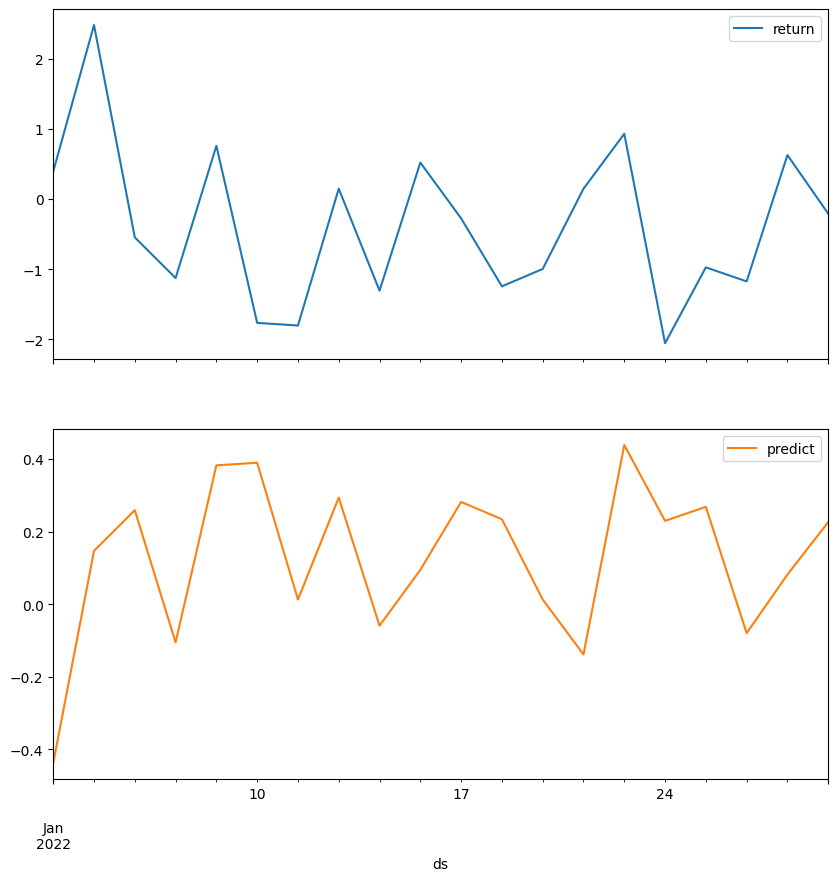

In [124]:
results[:20].plot(subplots=True, figsize = (10, 10))

In [125]:
mse = mean_squared_error(
    results["return"],
    results["predict"]
)

In [126]:
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 1.238232078430185
